## Retrieving data

In [75]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [76]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## What are the total sales for each payment method?

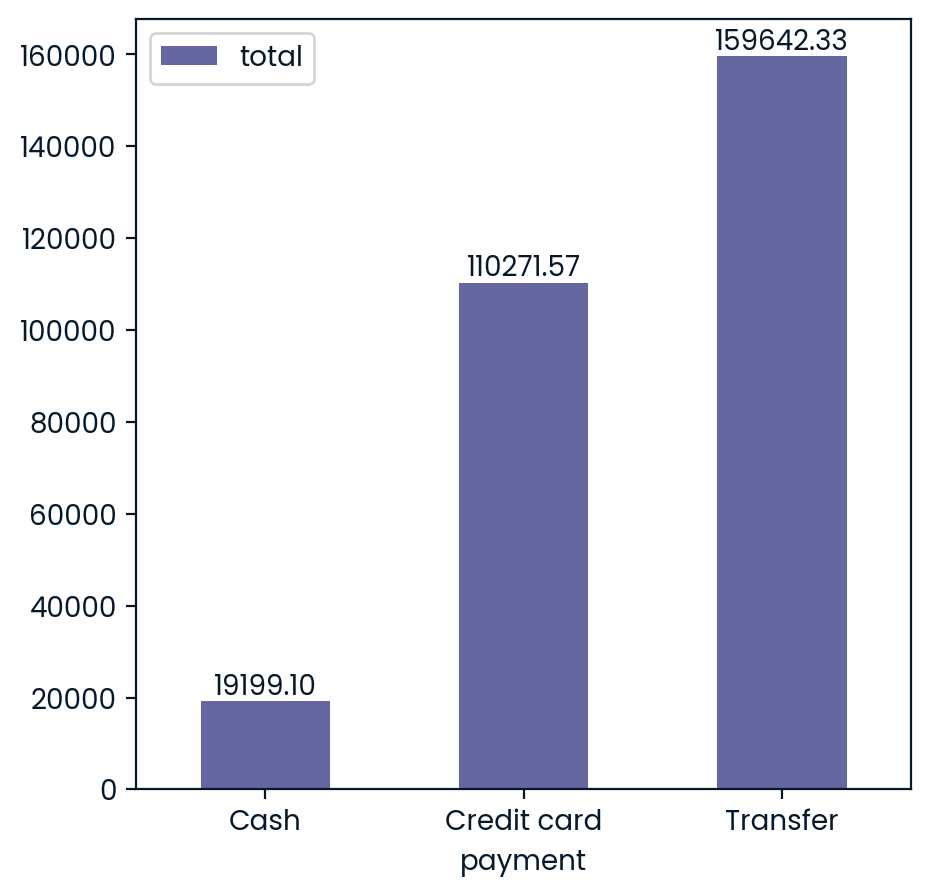

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [77]:
a = df.groupby('payment')[['total']].sum()

fig, ax = plt.subplots(figsize=(5, 5))

bars = a.plot(kind='bar',ax=ax)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                    
        ha='center',                        
        va='bottom'                         
    )
plt.xticks(rotation=0)
plt.show()

df.groupby('payment')[['total']].sum()

### Total sales is through 'Transfer'.

## What is the average unit price for each product line?

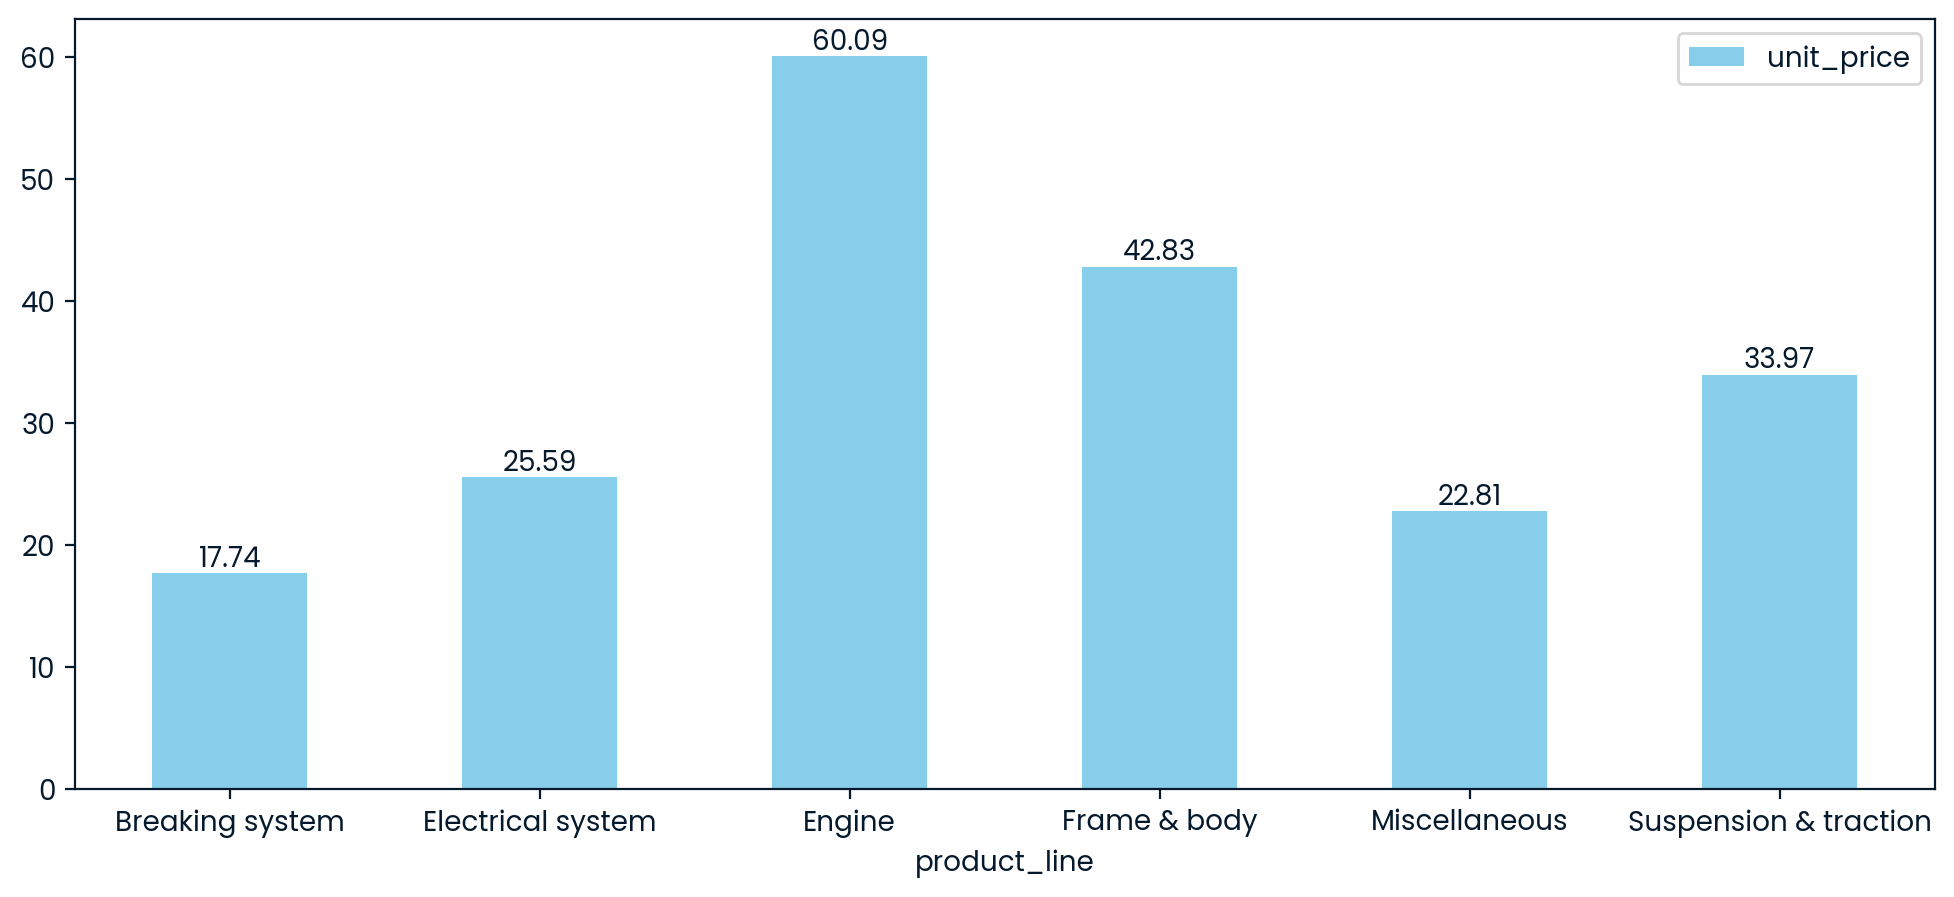

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


In [78]:
b = df.groupby('product_line')[['unit_price']].mean()

fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data
bars = b.plot(kind='bar', ax=ax, color='skyblue')

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                    
        ha='center',                        
        va='bottom'                         
    )

plt.xticks(rotation=0)
plt.show()

df.groupby('product_line')[['unit_price']].mean()

### 'Engine' has highest unit price.

## Show corelation among 'Total', 'Unit Price', 'Quantity'.

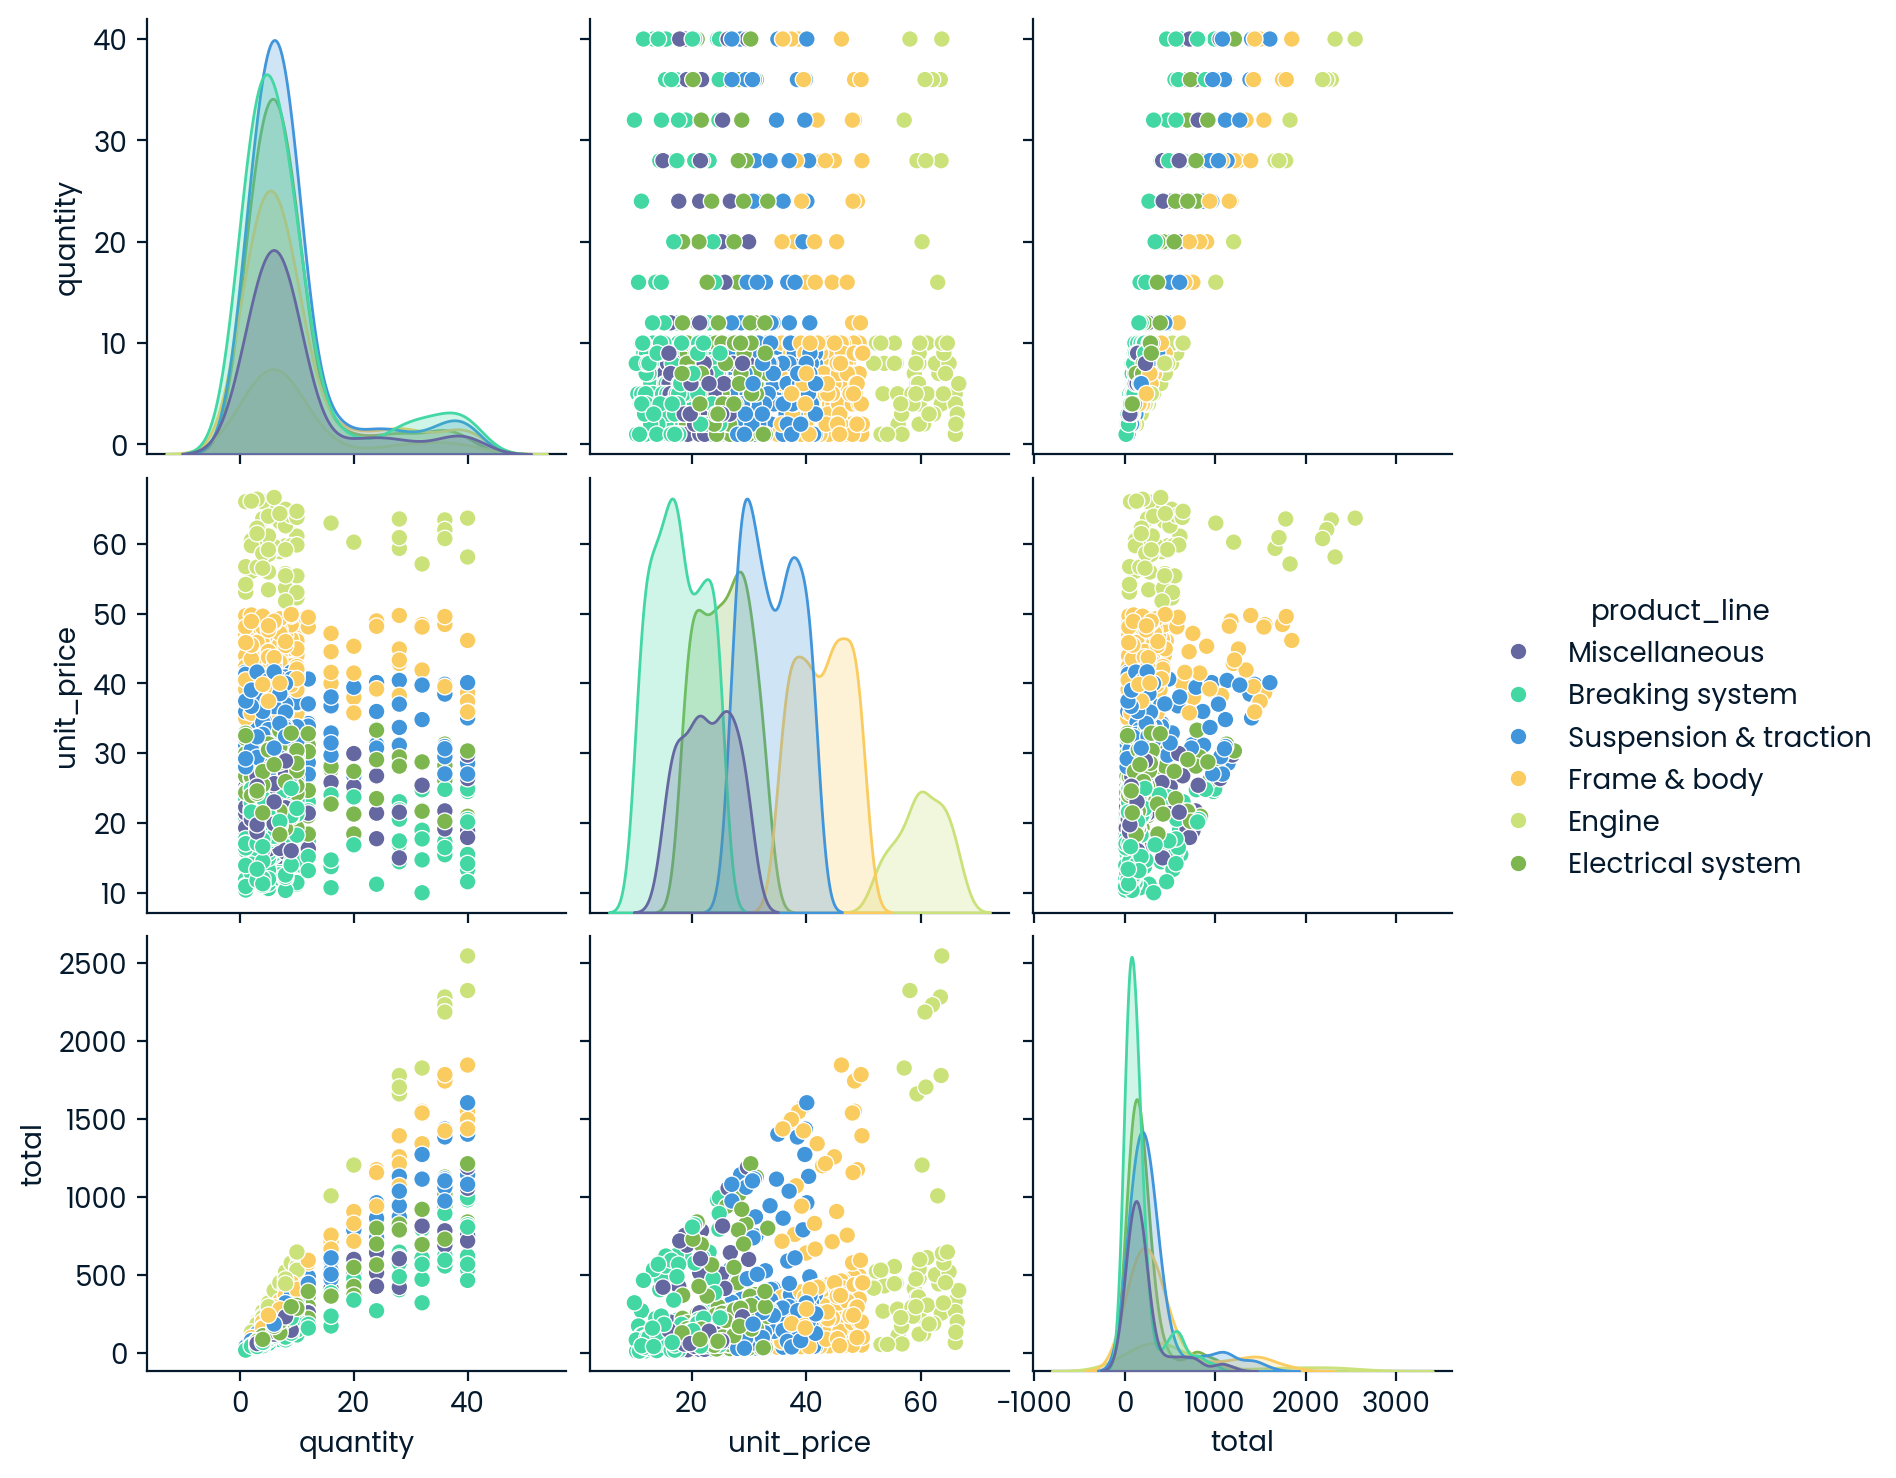

In [79]:
sns.pairplot(df,hue='product_line')

### 'Quantity' and 'Unit Price' is directly proportional to 'Total'

In [80]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


Dividing 'Day', 'Month', 'Year' from date and making new dataframe for each warehouse

In [81]:
df_copy = df.copy()

df_copy['day'] = df_copy['date'].dt.day
df_copy['month'] = df_copy['date'].dt.month
df_copy['year'] = df_copy['date'].dt.year

#'Filtering' on different warehouse.

north_warehouse_data = df_copy[df_copy['warehouse'] == 'North']  
north = north_warehouse_data.groupby('month')['total'].sum().reset_index()

central_warehouse_data = df_copy[df_copy['warehouse'] == 'Central'] 
central = central_warehouse_data.groupby('month')['total'].sum().reset_index()

west_warehouse_data = df_copy[df_copy['warehouse'] == 'West']  
west = west_warehouse_data.groupby('month')['total'].sum().reset_index()

<Figure size 640x480 with 0 Axes>

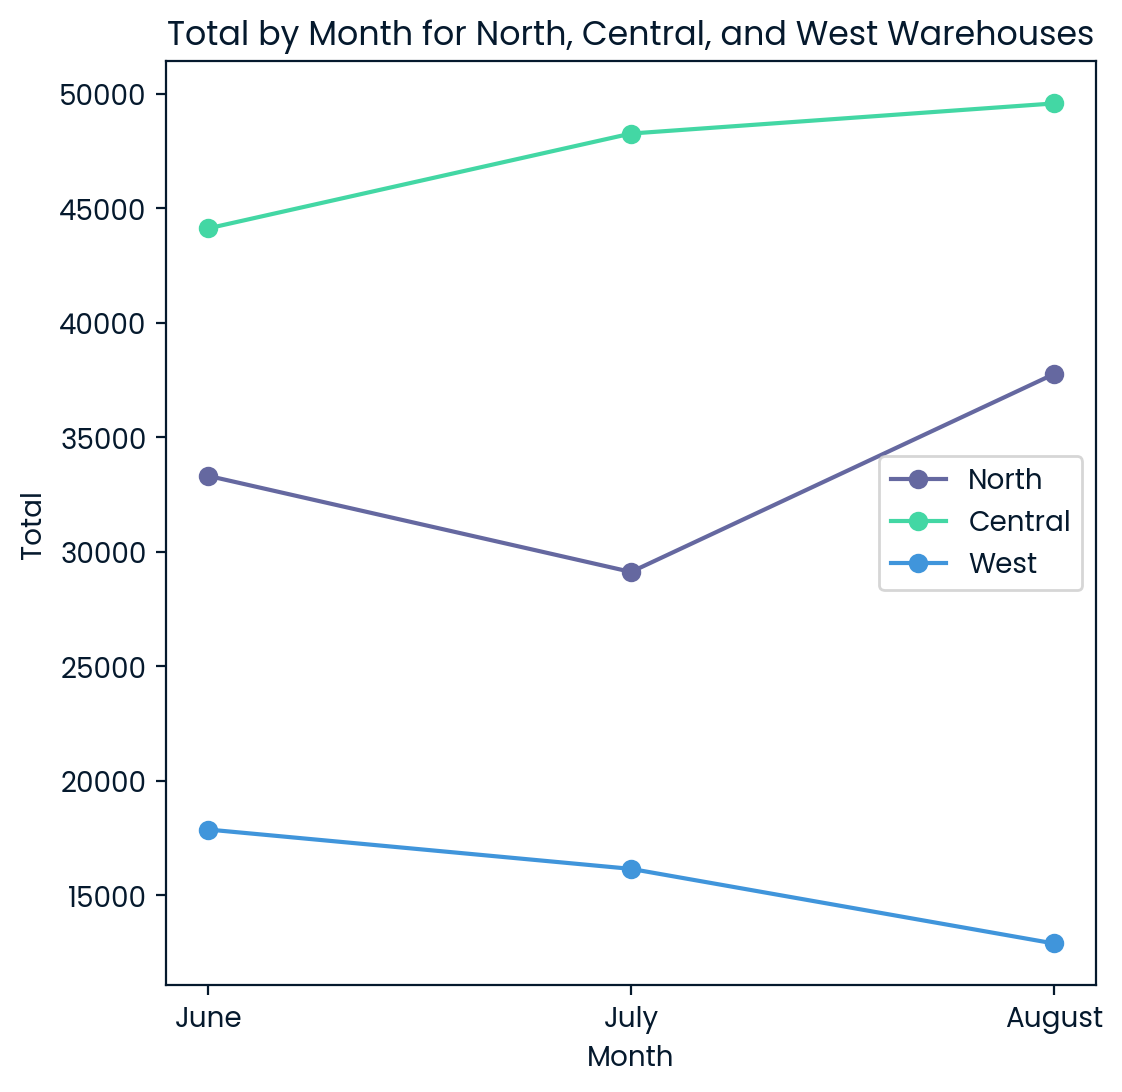

In [82]:
plt.figure()

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(north["month"], north["total"], label='North', marker='o')
ax.plot(central["month"], central["total"], label='Central', marker='o')
ax.plot(west["month"], west["total"], label='West', marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.set_title('Total by Month for North, Central, and West Warehouses')


ax.set_xticks([6, 7, 8])
ax.set_xticklabels(['June', 'July', 'August'])

ax.legend()

plt.show()

### 'Central' warehouse has highest total sale among three warehouse across three months.

## Which 'Product Line' has highest sale across three warehouse?

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
warehouse,,,,,,
Central,17792.53,21994.56,27263.14,30040.56,12220.88,32671.21
North,10588.13,15247.27,7236.73,28397.86,8618.67,30114.97
West,9969.49,6370.88,3445.51,10586.31,6326.27,10228.03


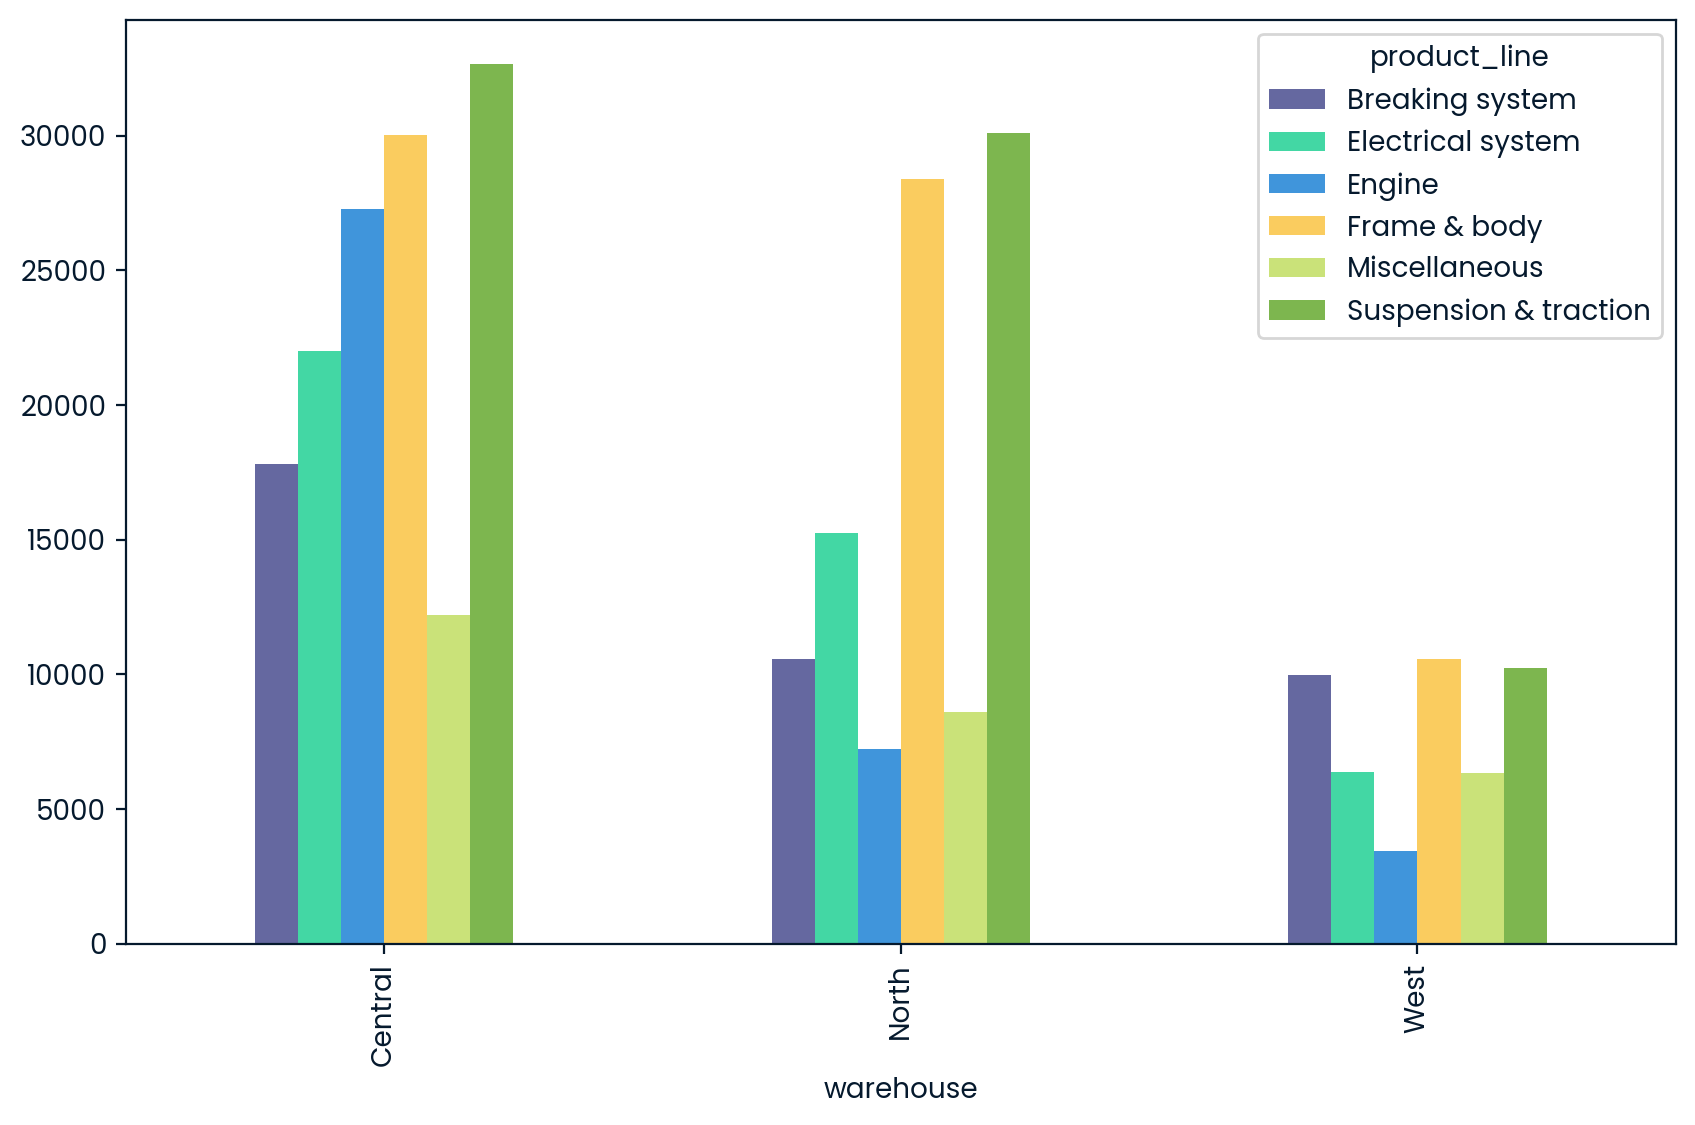

In [83]:
df.pivot_table(index='warehouse',columns='product_line',values='total',aggfunc='sum').plot(kind='bar', figsize=(10, 6))

df.pivot_table(index='warehouse',columns='product_line',values='total',aggfunc='sum')

### 'Suspension & Traction' has sale in 'North' and 'Central' warehouse and 'Frame & Body' has in 'West'.

## Which 'Client type' has highest among each warehouse.

<AxesSubplot: xlabel='warehouse'>

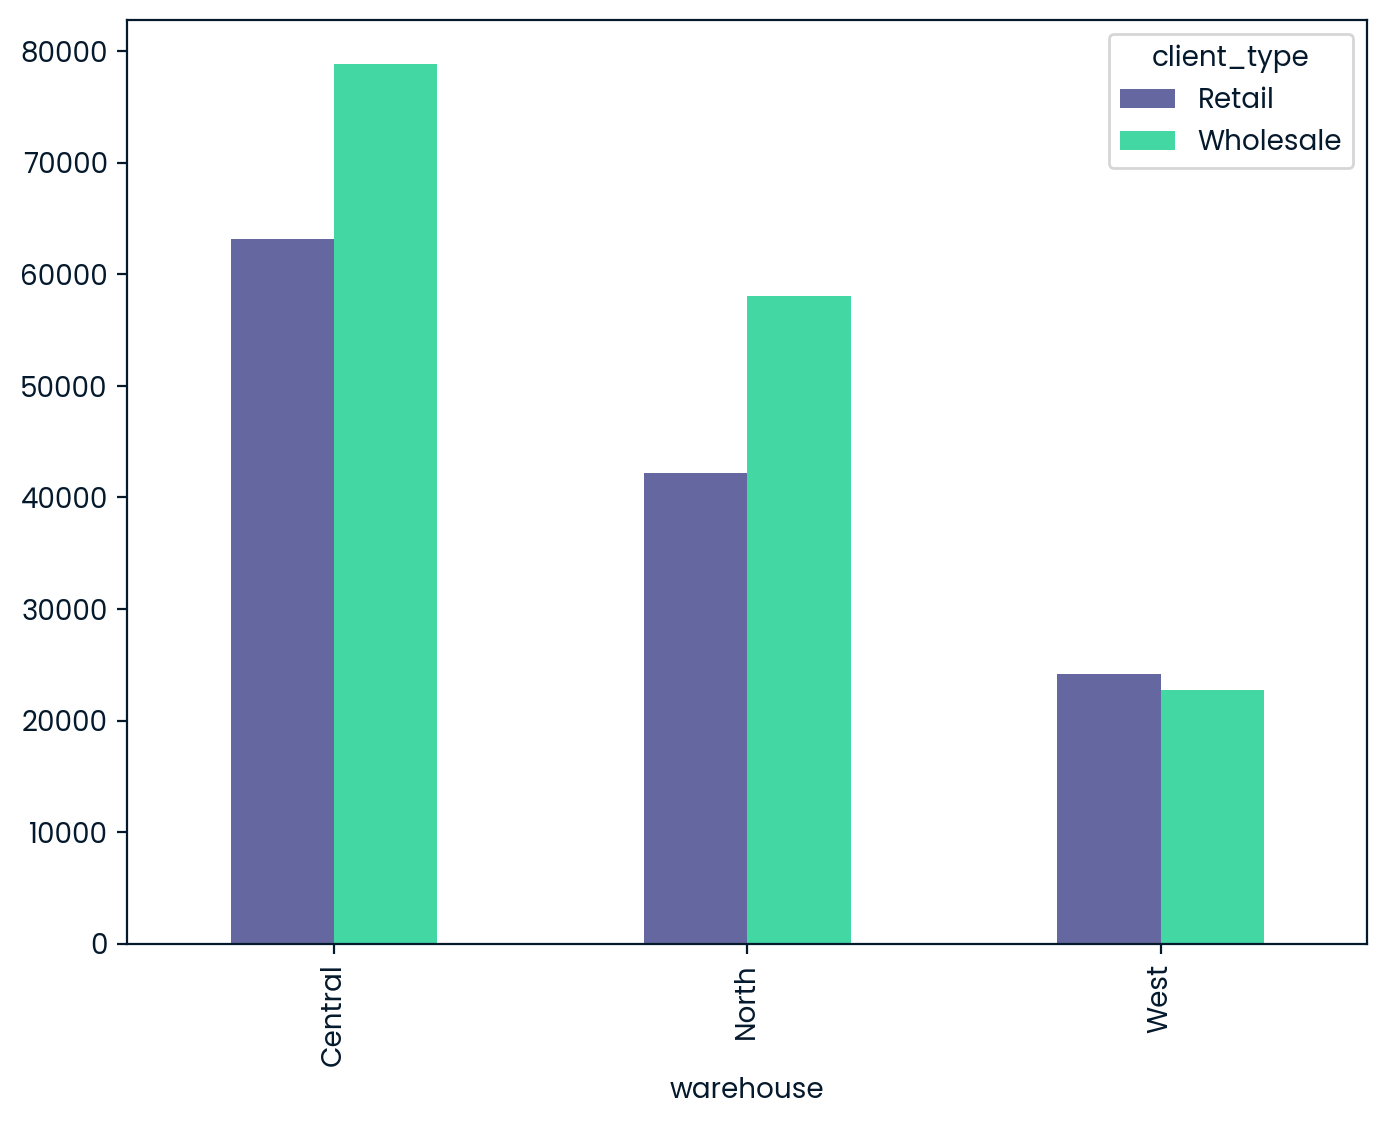

In [84]:
df.pivot_table(index='warehouse',columns='client_type',values='total',aggfunc='sum').plot(kind='bar', figsize=(8, 6))

### Central and 'North' has highest 'Wholesale' whereas 'West' has 'Retail' sales.

## Which 'Product Line' has highest according to 'Client Type'

<AxesSubplot: xlabel='client_type'>

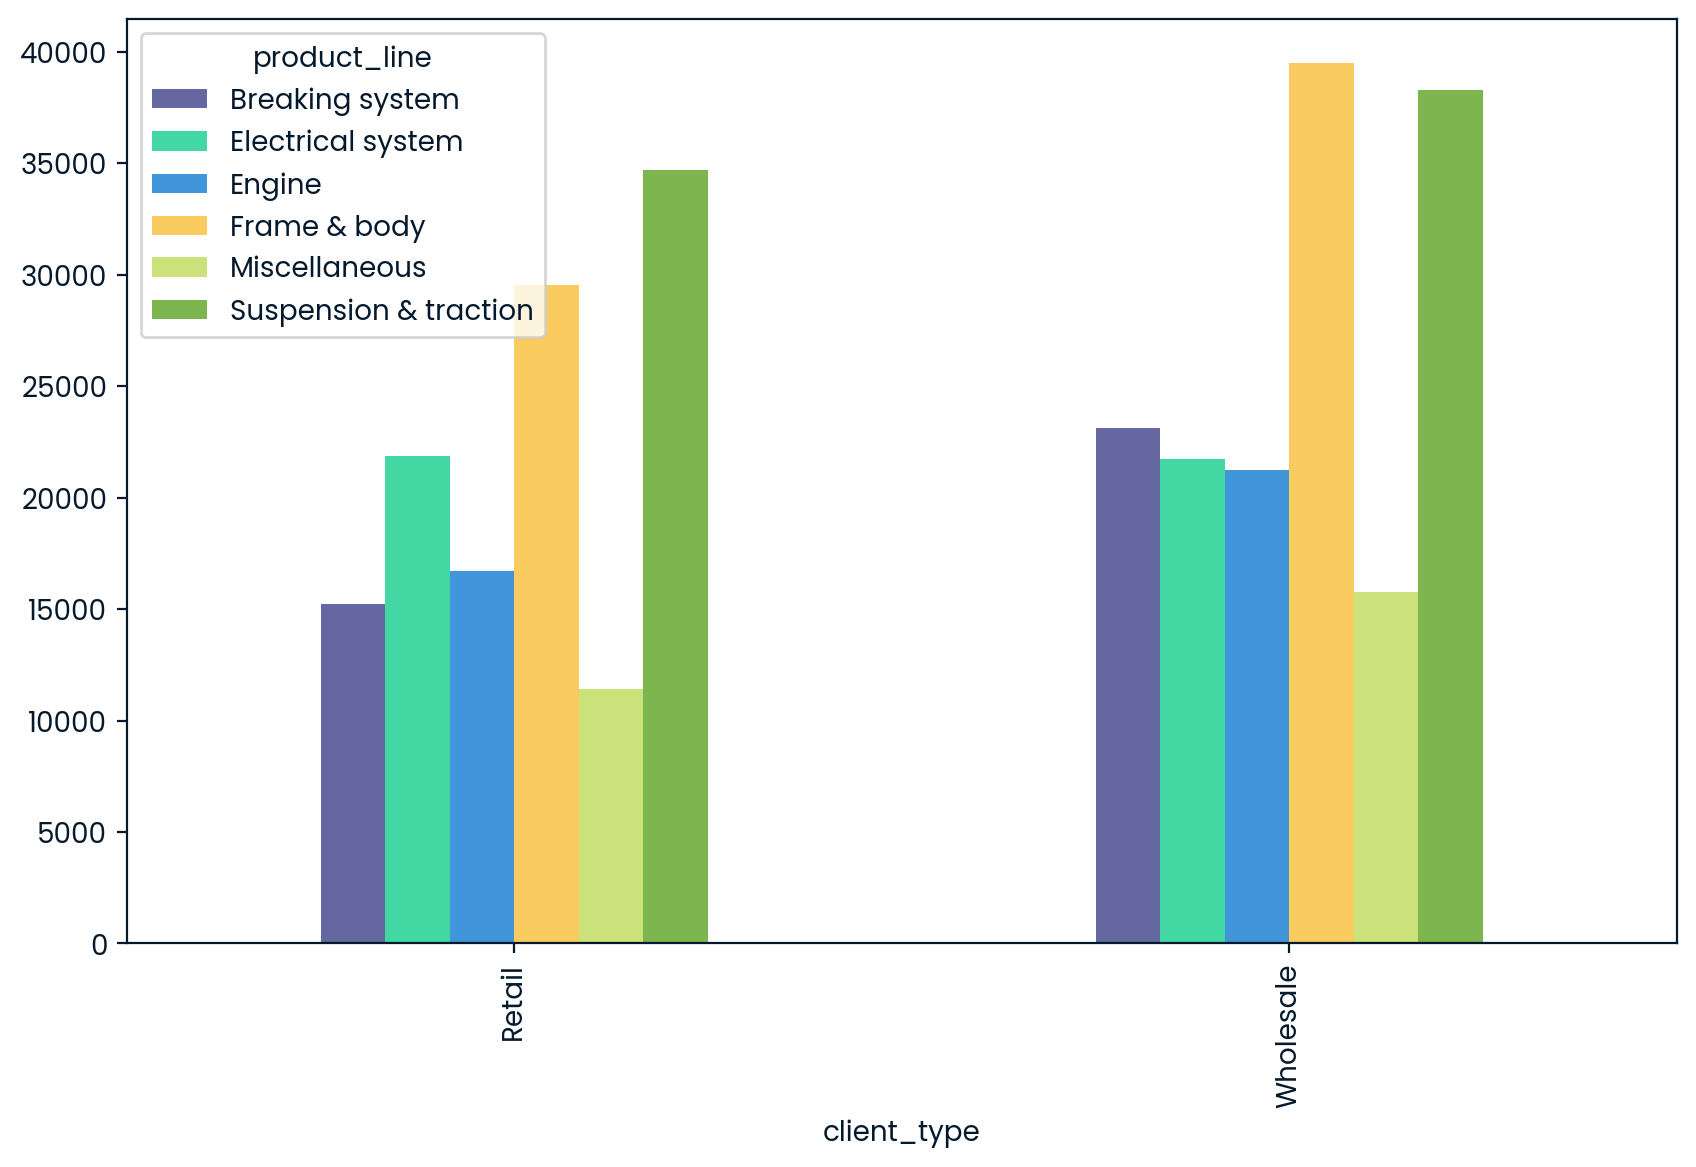

In [85]:
df.pivot_table(index='client_type',columns='product_line',values='total',aggfunc='sum').plot(kind='bar', figsize=(10, 6))

### 'Suspension & Traction' has highest in both 'Client type'

## Which has 'Product line' highest sales in total?

<AxesSubplot: xlabel='product_line'>

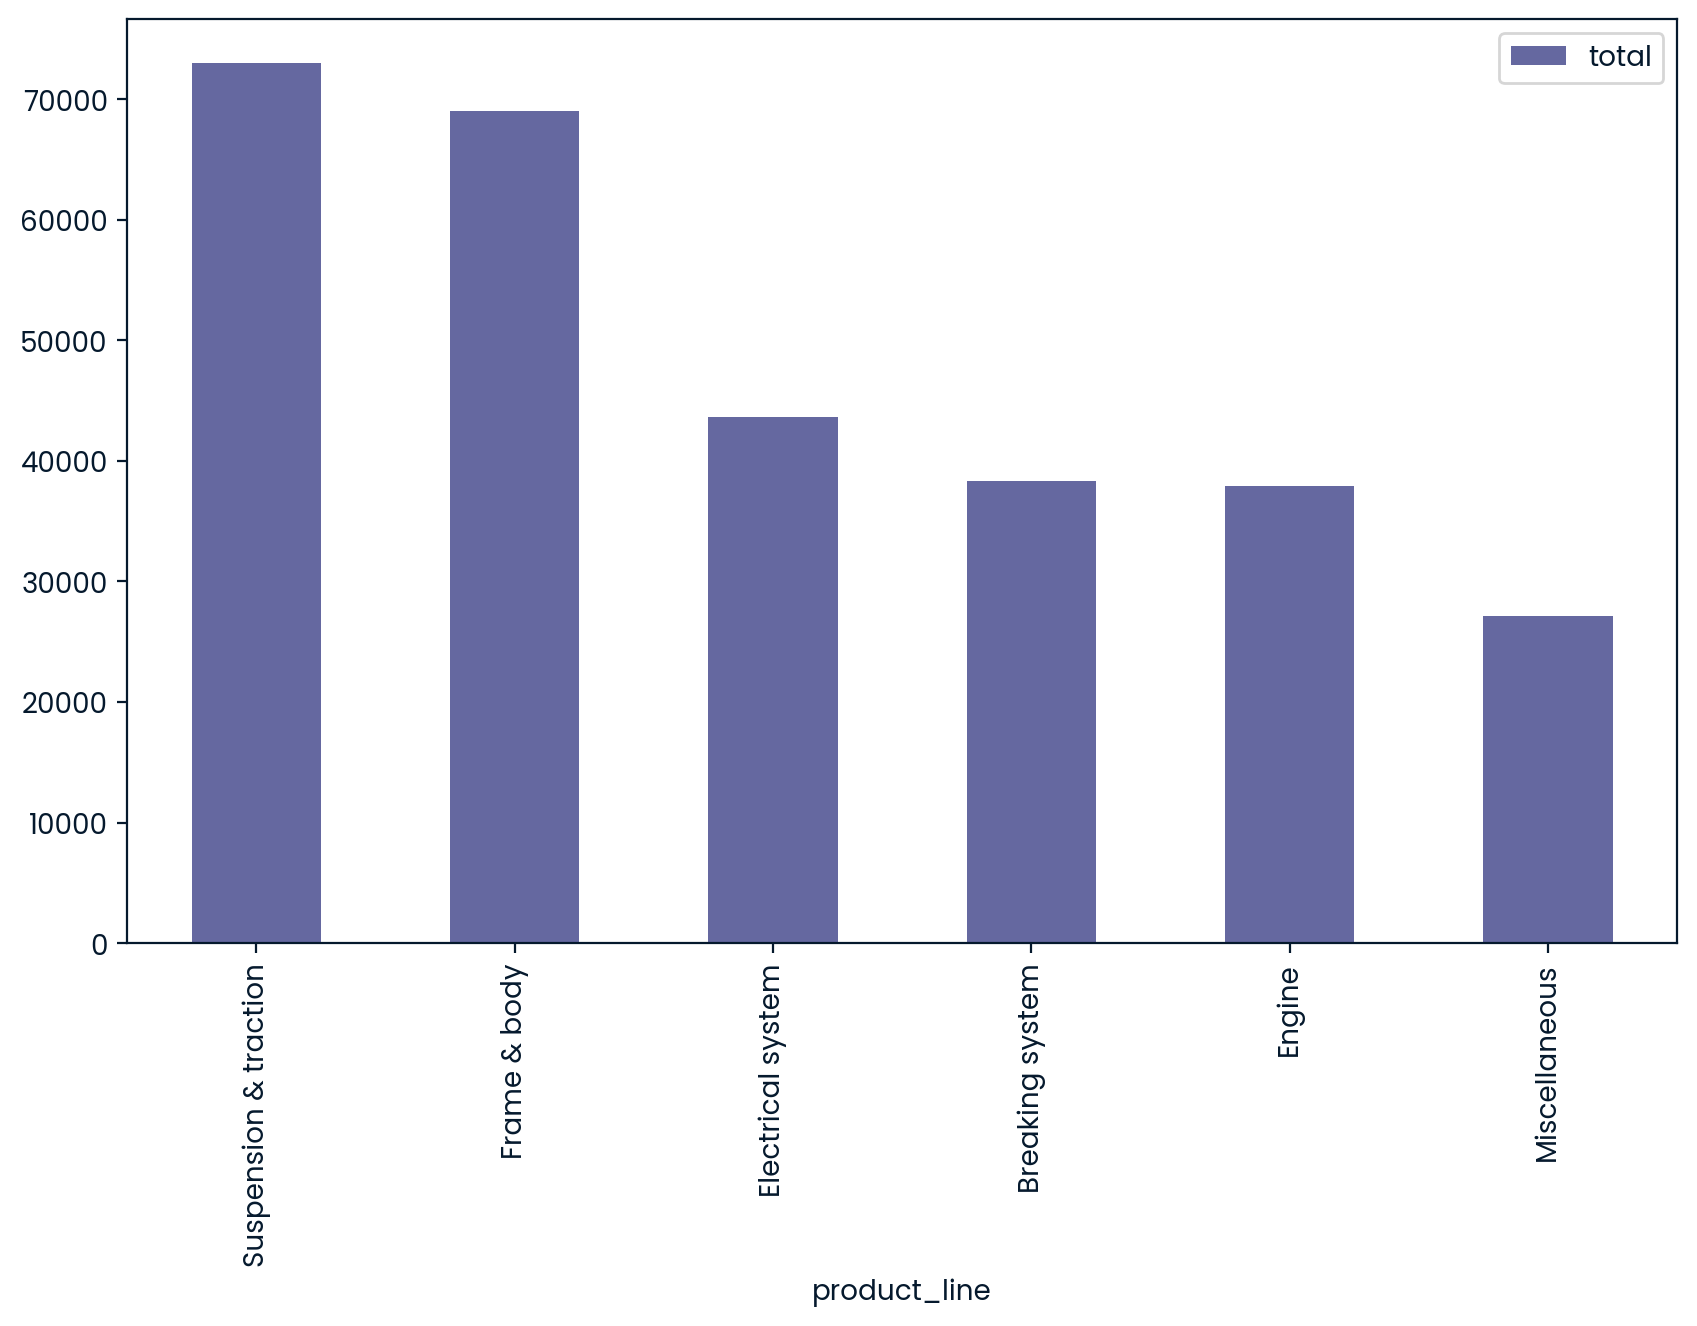

In [86]:
df.pivot_table(index='product_line',values='total',aggfunc='sum').sort_values(by='total', ascending=False).plot(kind='bar', figsize=(10, 6))

### 'Suspension & traction' has highest sales in total.

## Which 'Client type' has highest average sales?

<AxesSubplot: xlabel='client_type'>

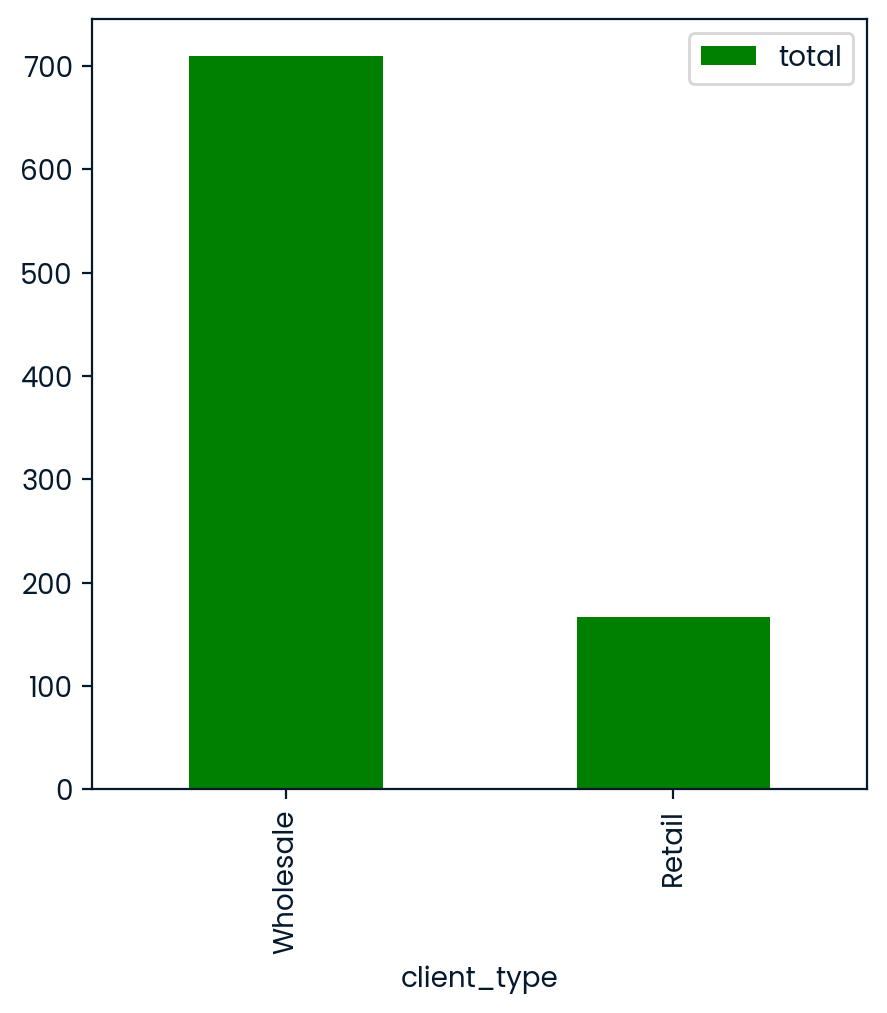

In [87]:
df.pivot_table(index='client_type',values='total',aggfunc='mean').sort_values(by='total', ascending=False).plot(kind='bar', figsize=(5, 5),color='green')

### 'Wholesale' has highest average sales.

## Which 'Product Line' has highest average 'Quantity'?

<AxesSubplot: xlabel='product_line'>

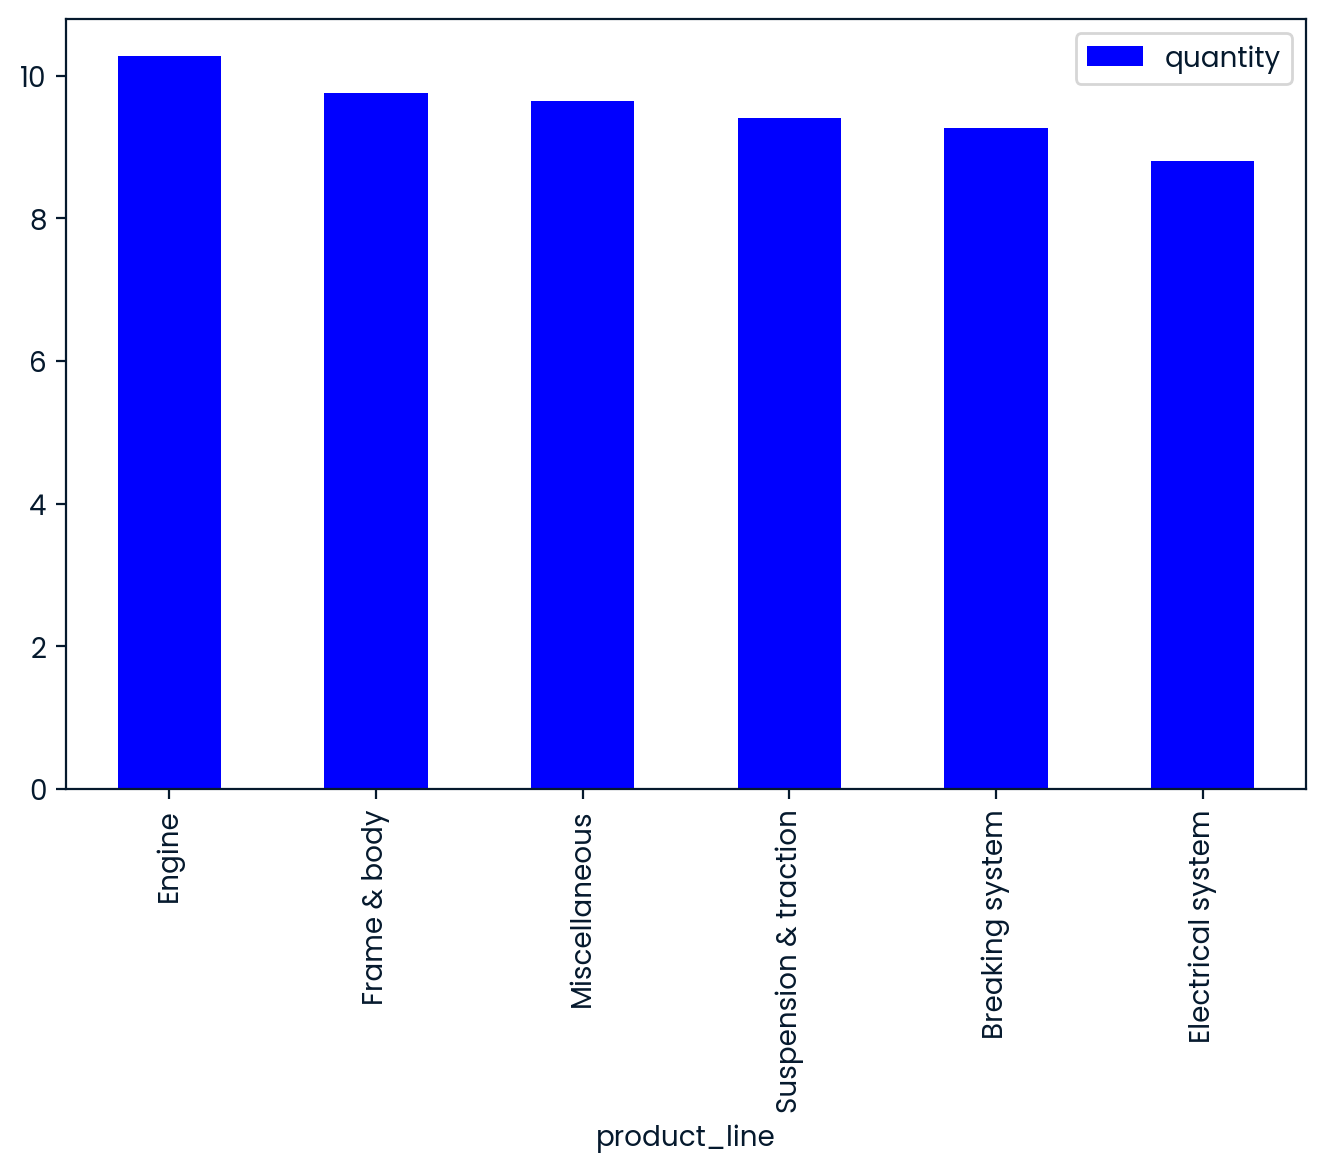

In [88]:
df.pivot_table(index='product_line',values='quantity',aggfunc='mean').sort_values(by='quantity', ascending=False).plot(kind='bar', figsize=(8, 5),color='blue')

### 'Engine' has highest average quanity in Product Line.

# Conclusion

'Central' warehouse is most important warehouse as it total sales is highest and 'North' is second and 'West' is third.

'Suspension & Traction' parts are most sell and has highest total sales. It is highest in particularly in 'Central' and 'North'. 'Frame & Body’ is highest in ‘West’. 'Engine' parts prices are highest on average.

'Wholesale' has highest sales. 'Central' and 'North' has highest 'Wholesale' whereas 'West' has 'Retail' sales.

'Transfer' is most preferred over any other payment methods.